In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
df_1 = pd.read_csv('../data/data_3__.csv')
df_1 = df_1.drop(['index'],axis=1)
df_1.head()

,data,valor
0,2018-08-21,3914.55
1,2018-08-22,3713.02
2,2018-08-23,8001.75
3,2018-08-24,11312.95
4,2018-08-25,15230.01


In [3]:
df_1.tail(31)

,data,valor
41,2018-10-01,4516.65
42,2018-10-02,4719.77
43,2018-10-03,5325.13
44,2018-10-04,10793.82
45,2018-10-05,16439.73
46,2018-10-06,16145.05
47,2018-10-07,14954.49
48,2018-10-08,3660.66
49,2018-10-09,3445.37
50,2018-10-10,5815.37


In [4]:
df_1.describe()

,valor
count,72.000000
mean,9094.570694
std,4993.023179
min,2321.520000
25%,4223.057500
50%,8759.895000
75%,13907.340000
max,18605.450000


In [5]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [6]:
df = df_1
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2018-08-21,3914.55
1,2018-08-22,3713.02
2,2018-08-23,8001.75
3,2018-08-24,11312.95
4,2018-08-25,15230.01


In [7]:
prediction_size = 31
train_df = df[:-prediction_size]

In [8]:
train_df.tail()

,ds,y
36,2018-09-26,4368.52
37,2018-09-27,8773.46
38,2018-09-28,10285.94
39,2018-09-29,15714.05
40,2018-09-30,14146.15


In [9]:
m = Prophet()
m.fit(train_df)

In [10]:
future = m.make_future_dataframe(periods=31)

forecast = m.predict(future)

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67,2018-10-27,9973.481336,14737.503733,19599.139377,9973.480799,9973.481882,7103.833520,7103.833520,7103.833520,7103.833520,7103.833520,7103.833520,0.0,0.0,0.0,17077.314856
68,2018-10-28,9991.670925,11580.426114,16368.414532,9991.670356,9991.671507,4000.312482,4000.312482,4000.312482,4000.312482,4000.312482,4000.312482,0.0,0.0,0.0,13991.983408
69,2018-10-29,10009.860514,1554.031167,6592.727318,10009.859922,10009.861130,-5924.696369,-5924.696369,-5924.696369,-5924.696369,-5924.696369,-5924.696369,0.0,0.0,0.0,4085.164146
70,2018-10-30,10028.050103,1990.477690,7004.178645,10028.049476,10028.050750,-5614.574519,-5614.574519,-5614.574519,-5614.574519,-5614.574519,-5614.574519,0.0,0.0,0.0,4413.475584
71,2018-10-31,10046.239693,3447.120896,8199.215299,10046.239032,10046.240376,-4204.227379,-4204.227379,-4204.227379,-4204.227379,-4204.227379,-4204.227379,0.0,0.0,0.0,5842.012314


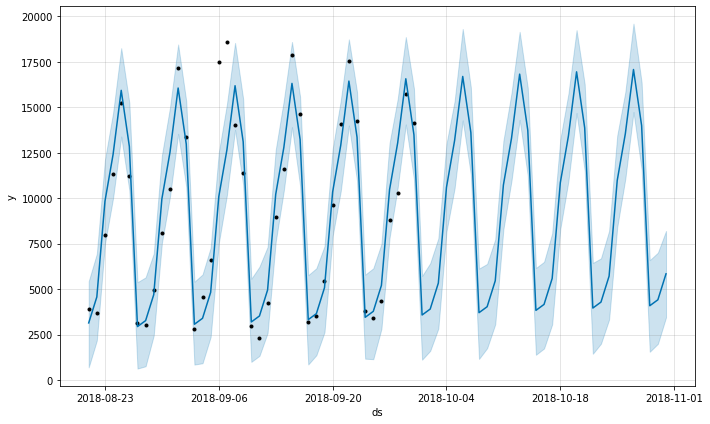

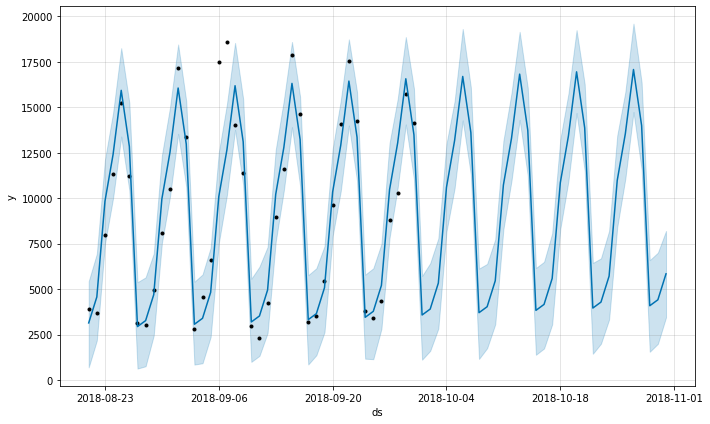

In [12]:
m.plot(forecast)

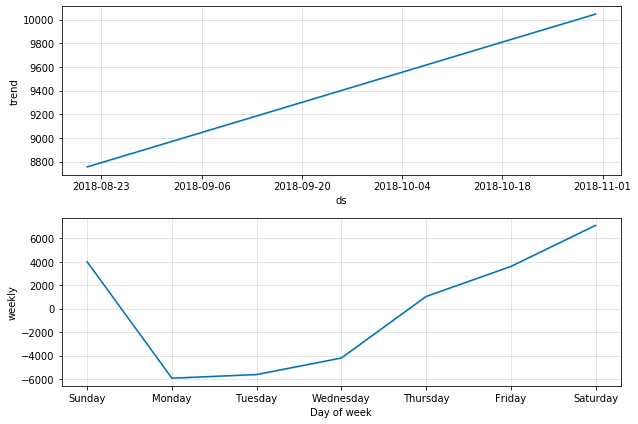

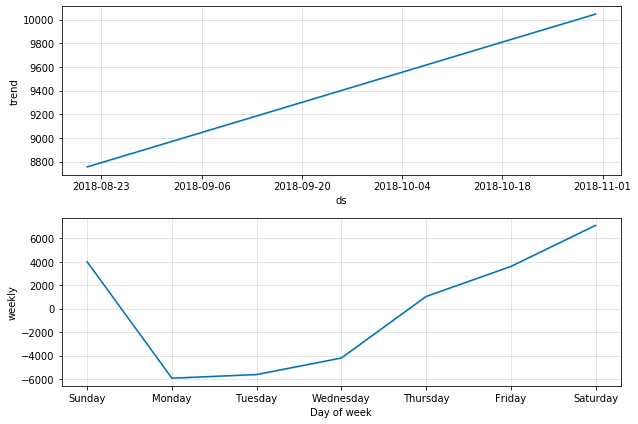

In [13]:
m.plot_components(forecast)

In [14]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [15]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df = cmp_df.dropna()


In [16]:
print('MAE:', metrics.mean_absolute_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))  
print('MSE:', metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:])))

MAE: 1306.1888004625725
MSE: 2893035.425266953
RMSE: 1700.8925378362248


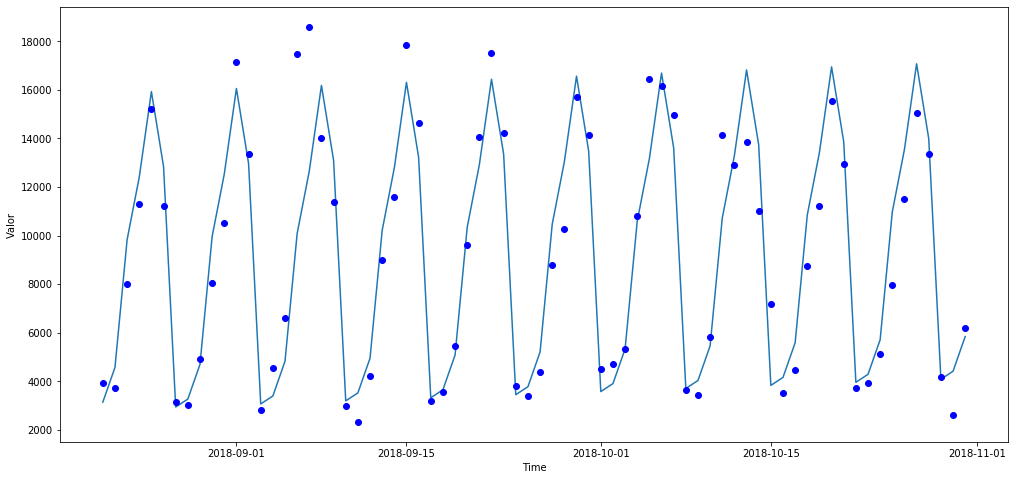

In [17]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'],'bo')
plt.xlabel('Time')
plt.ylabel('Valor')
plt.grid(False)
plt.show()